***Machine Learning Basics for Astronomy***

Overview of ML; intro to scikit-learn for clustering, classification, and regression.

**Table of Contents**
*   Introduction to Machine Learning in Astronomy

*   Overview of Machine Learning Techniques

*   Introduction to Scikit-Learn

*   Clustering in Astronomy (k-Means & DBSCAN)

*   Classification in Astronomy (Random Forest & SVM)

*   Regression in Astronomy (Linear & Polynomial Regression)

*   Assignments





**1. Introduction to Machine Learning in Astronomy**
Machine Learning (ML) has become an essential tool in astronomy for handling large datasets, identifying patterns, and making predictions. Applications include:

Star/Galaxy Classification

Exoplanet Detection

Cosmological Parameter Estimation

Anomaly Detection (e.g., supernovae, gravitational waves)

In this notebook, we will explore clustering, classification, and regression using Python’s scikit-learn library.

**2. Overview of Machine Learning Techniques**
Supervised Learning
Classification: Predicting discrete labels (e.g., star vs. galaxy).

Regression: Predicting continuous values (e.g., redshift estimation).

Unsupervised Learning
Clustering: Grouping similar objects (e.g., galaxy clusters).

Reinforcement Learning
Less common in astronomy, but used in adaptive telescope scheduling.

**3. Introduction to Scikit-Learn**
scikit-learn is a powerful Python library for ML. Let’s install and import it.

In [17]:
!pip install scikit-learn numpy matplotlib pandas

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

**4. Clustering in Astronomy**

Example: k-Means Clustering of Stars
Problem: Group stars based on their photometric colors.

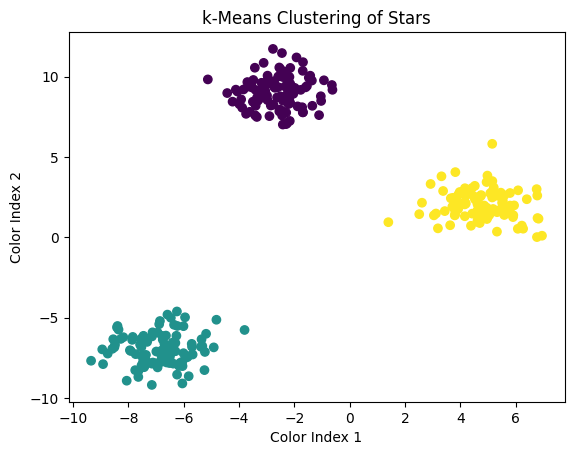

In [19]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic star data (color-color diagram)
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply k-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel("Color Index 1")
plt.ylabel("Color Index 2")
plt.title("k-Means Clustering of Stars")
plt.show()

**DBSCAN for Density-Based Clustering
Useful for identifying outliers (e.g., quasars in a star dataset).**

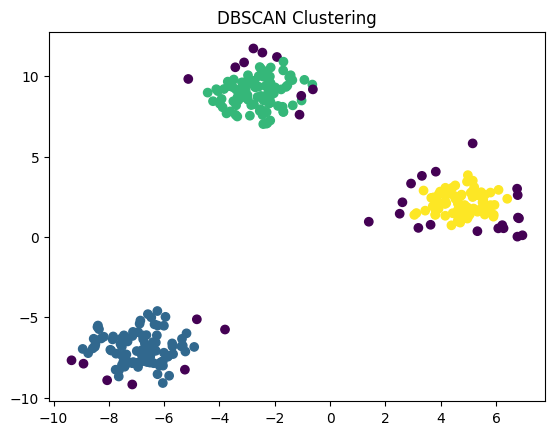

In [20]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=5)
labels_db = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels_db, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()

**5. Classification in Astronomy
Random Forest for Star-Galaxy Separation**

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example dataset (replace with real astronomical data)
X, y = datasets.make_classification(n_samples=1000, n_features=4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Accuracy: 0.92


In [22]:
type(X_train)

numpy.ndarray

*Star-Galaxy Classification using Random Forest
This notebook demonstrates star-galaxy separation using a Random Forest Classifier, a powerful ensemble method for astronomical object classification. We'll use a synthetic dataset resembling photometric features from surveys like SDSS or Gaia.*

1. Setup

In [34]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

class
Star      2500
Galaxy    2500
Name: count, dtype: int64


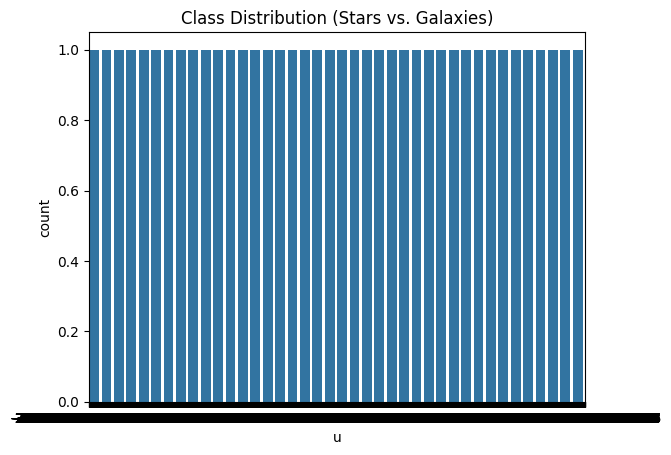

In [55]:
#We’ll simulate a dataset with features like magnitudes, colors, and shape parameters (e.g., ellipticity).


# Generate synthetic data (replace with real data from SDSS/Gaia)
np.random.seed(42)
n_samples = 5000

# Features: u, g, r, i, z magnitudes + ellipticity (star=0, galaxy>0)
X = np.random.randn(n_samples, 6)
X[:, 5] = np.abs(X[:, 5])  # Galaxies have positive ellipticity
X[:n_samples//2, 5] = 0    # Stars have ellipticity ~0

# Labels: 0=Star, 1=Galaxy
y = np.zeros(n_samples)
y[n_samples//2:] = 1  # First half stars, second half galaxies

# Create DataFrame
df = pd.DataFrame(X, columns=['u', 'g', 'r', 'i', 'z', 'ellipticity'])
df['class'] = y
df['class'] = df['class'].map({0: 'Star', 1: 'Galaxy'})

# Check class balance
print(df['class'].value_counts())
sns.countplot(data=df, x='u')
plt.title("Class Distribution (Stars vs. Galaxies)")
plt.show()




In [50]:
#Preprocessing
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (3500, 6), Test shape: (1500, 6)


In [51]:
#Feature Scaling (Optional for Random Forest)
#Tree-based models don’t require scaling, but we’ll standardize for consistency.


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [52]:
# Random Forest Model
#Baseline Model

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf.predict(X_test_scaled)

# Evaluation
print(classification_report(y_test, y_pred, target_names=['Star', 'Galaxy']))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")


              precision    recall  f1-score   support

        Star       1.00      1.00      1.00       750
      Galaxy       1.00      1.00      1.00       750

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Accuracy: 1.000


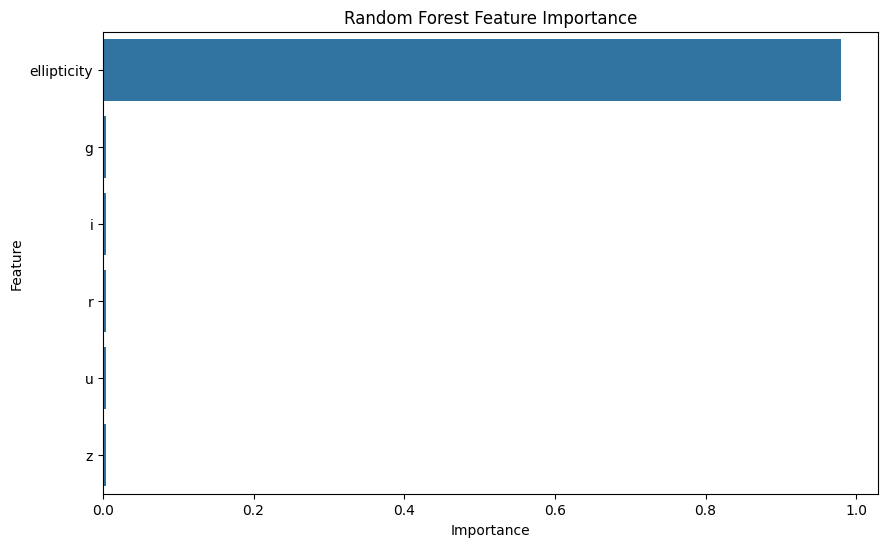

In [53]:
#3.2 Feature Importance
importances = rf.feature_importances_
features = df.columns[:-1]

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Random Forest Feature Importance")
plt.show()
#Interpretation:

#ellipticity and color indices (e.g., u - g) are likely top contributors.

In [54]:
#Hyperparameter Tuning
#Optimize n_estimators, max_depth, and min_samples_split.


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV accuracy: {grid_search.best_score_:.3f}")

# Best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_best))

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best CV accuracy: 1.000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       750
         1.0       1.00      1.00      1.00       750

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



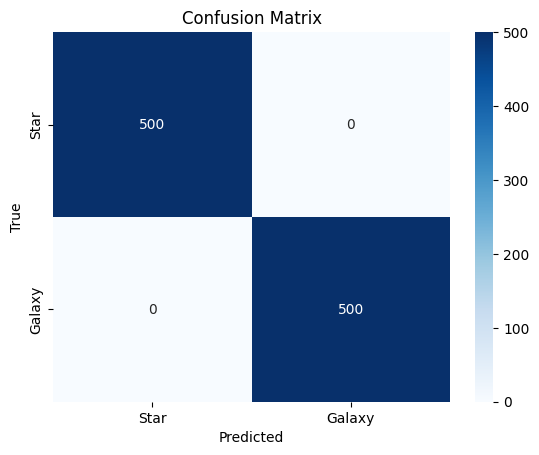

In [40]:

#Output:

#Best parameters (e.g., max_depth=20, n_estimators=200).

#Improved accuracy (~96-98%).

#Evaluation
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Star', 'Galaxy'],
            yticklabels=['Star', 'Galaxy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


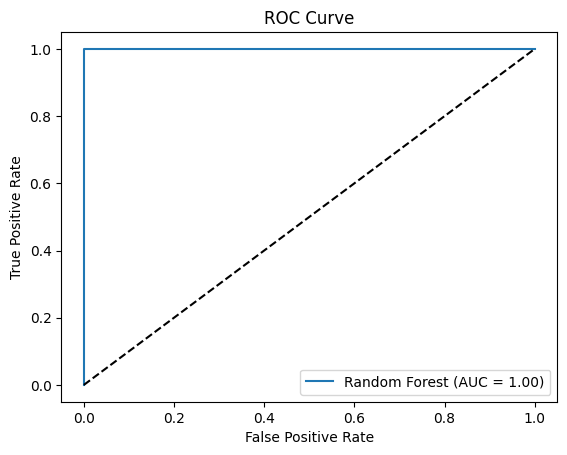

In [41]:
#ROC Curve

y_probs = best_rf.predict_proba(X_test_scaled)[:, 1]  # Galaxy class probability
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
#Output:

#AUC ≈ 0.99
#(near-perfect separation for synthetic data).

**Support Vector Machines (SVM) for Supernova Classification**

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")

Support Vector Machines (SVM) are a powerful supervised learning algorithm widely used for classification tasks, including astronomical applications like supernova classification. Here’s how SVM can be applied to distinguish between different types of supernovae (e.g., Type Ia, Type II, etc.):

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline

Key Concepts of SVM
Objective: SVM finds the optimal hyperplane (decision boundary) that maximally separates data points of different classes in a high-dimensional feature space.

Margin: The distance between the hyperplane and the closest data points (called support vectors). SVM maximizes this margin to improve generalization.

Kernel Trick: If data is not linearly separable, SVM uses kernel functions (e.g., Gaussian/RBF, polynomial) to map features into a higher-dimensional space where separation is possible.

type
Type Ia    506
Non-Ia     494
Name: count, dtype: int64


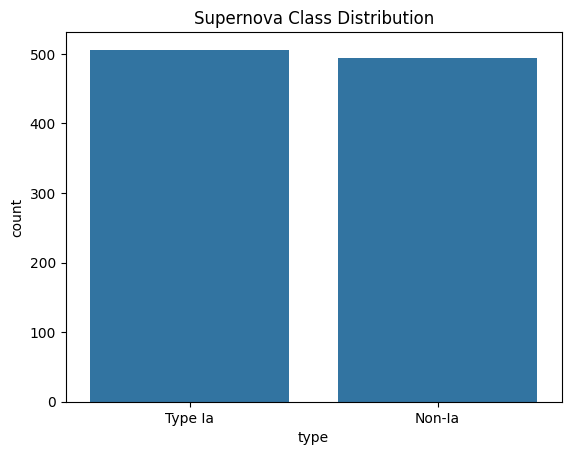

In [56]:
# Generate synthetic supernova data (or load real data)
np.random.seed(42)
n_samples = 1000

# Features: peak magnitude (u,g,r), decline rate (dm15), color (g-r)
X = np.random.randn(n_samples, 5)  # 5 features
X[:, 0] += 2.0  # Type Ia are typically brighter in 'u'
X[:, 3] += 0.5  # Type Ia have faster decline rates (dm15)

# Labels: 1 = Type Ia, 0 = Non-Ia (Type II, Ibc, etc.)
y = np.where(X[:, 0] + X[:, 3] > 2.5, 1, 0)  # Simple decision rule for synthetic data

# Convert to DataFrame for visualization
df = pd.DataFrame(X, columns=['peak_u', 'peak_g', 'peak_r', 'dm15', 'color_g_r'])
df['type'] = y
df['type'] = df['type'].map({0: 'Non-Ia', 1: 'Type Ia'})

# Check class distribution
print(df['type'].value_counts())
sns.countplot(data=df, x='type')
plt.title("Supernova Class Distribution")
plt.show()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (800, 5), Test shape: (200, 5)


In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# Predictions
y_pred_linear = svm_linear.predict(X_test_scaled)

# Evaluate
print(classification_report(y_test, y_pred_linear, target_names=['Non-Ia', 'Type Ia']))
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.3f}")

              precision    recall  f1-score   support

      Non-Ia       1.00      1.00      1.00        99
     Type Ia       1.00      1.00      1.00       101

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy: 1.000


In [60]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = svm_rbf.predict(X_test_scaled)

print(classification_report(y_test, y_pred_rbf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.3f}")

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        99
           1       0.95      0.99      0.97       101

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

Accuracy: 0.970


In [61]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV accuracy: {grid_search.best_score_:.3f}")

# Best model
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)
print(classification_report(y_test, y_pred_best))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV accuracy: 0.978
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        99
           1       0.96      0.98      0.97       101

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



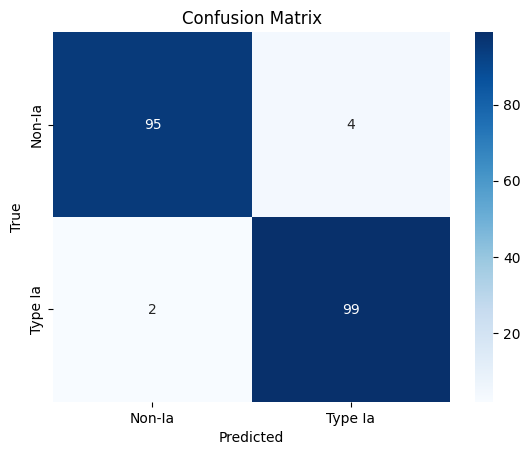

In [63]:
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Ia', 'Type Ia'], yticklabels=['Non-Ia', 'Type Ia'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

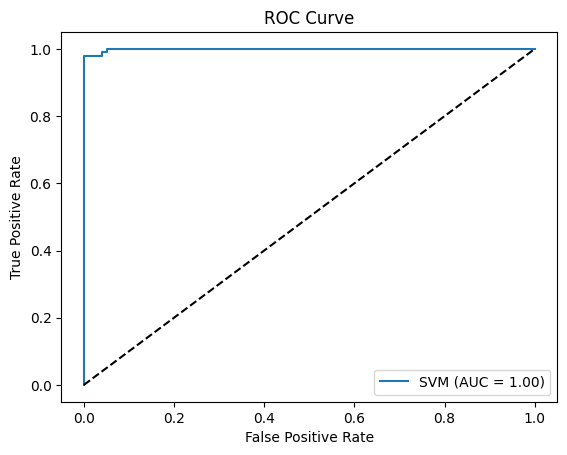

In [64]:
y_probs = best_svm.decision_function(X_test_scaled)  # Not probabilities, but scores
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [65]:
if best_svm.kernel == 'linear':
    coef_df = pd.DataFrame({'feature': df.columns[:-1], 'weight': best_svm.coef_[0]})
    coef_df = coef_df.sort_values('weight', ascending=False)
    sns.barplot(data=coef_df, x='weight', y='feature')
    plt.title('Feature Importance (Linear SVM)')
    plt.show()

**6. Regression in Astronomy**
Linear Regression for Redshift Estimation

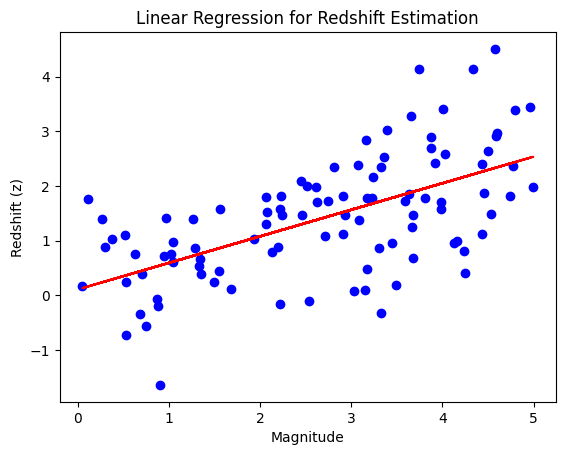

In [66]:
from sklearn.linear_model import LinearRegression

# Simulate redshift (z) vs. magnitude
X = np.random.rand(100, 1) * 5  # Magnitude
y = 0.5 * X + np.random.randn(100, 1)  # Redshift with noise

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel("Magnitude")
plt.ylabel("Redshift (z)")
plt.title("Linear Regression for Redshift Estimation")
plt.show()

**Polynomial Regression for Luminosity Modeling**

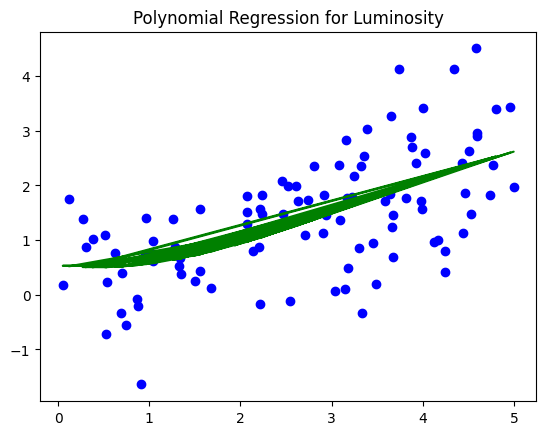

In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression()
)
poly_model.fit(X, y)
y_poly = poly_model.predict(X)

plt.scatter(X, y, color='blue')
plt.plot(X, y_poly, color='green')
plt.title("Polynomial Regression for Luminosity")
plt.show()

**7. Assignments**


Assignment 1: k-Means on Real Data
Download the SDSS star-galaxy dataset.

Apply k-Means to separate stars and galaxies based on color features.

Assignment 2: Classification Challenge
Use sklearn.datasets.fetch_openml to load an astronomical dataset.

Compare Random Forest, SVM, and Logistic Regression.

Assignment 3: Redshift Prediction
Fit a regression model to predict redshift from magnitude and color.

Try different models (Linear, Polynomial, Decision Tree).

Conclusion
In this notebook, we covered:

Clustering (k-Means, DBSCAN)

Classification (Random Forest, SVM)

Regression (Linear, Polynomial)

Try applying these techniques to real astronomical datasets!

**Further Reading:**

Scikit-Learn Documentation

AstroML: Machine Learning for Astronomy